# A Classification Walkthrough
<div class="alert alert-block alert-info">
<b>Content:</b> In this notebook, we demonstrate a technical
    pipeline for a classification experiment from identifying a dataset to (preliminary!) performance analysis of a classification algorithm!
</div>


## Data Acquisition

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
raw_data = digits.images
target = digits.target
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 1797\n:Number of Attributes: 64\n:Attribute Information: 8x8 image of integer pixels in the range 0..16.\n:Missing Attribute Values: None\n:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n:Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted in each bl

### Legal Aspects
_Are we allowed to use the data?_

The digits data set used in this notebook is a copy of the testset of the data licensed under the [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/) (CC BY 4.0) provided by: Alpaydin, E. & Kaynak, C.. (1998). Optical Recognition of Handwritten Digits. UCI Machine Learning Repository.

## Initial Data Analysis

In [3]:
print(f'Dataset type: {type(raw_data)}')
print(f'Target type: {type(target)}')
print(f'Dataset shape: {raw_data.shape}')
print(f'Target shape: {target.shape}')

Dataset type: <class 'numpy.ndarray'>
Target type: <class 'numpy.ndarray'>
Dataset shape: (1797, 8, 8)
Target shape: (1797,)


### Aquire domain knowledge
_What does the data mean?_

Check [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits):
"We used preprocessing programs made available by NIST to extract __normalized bitmaps of handwritten digits__ from a preprinted form. From a total of 43 people, 30 contributed to the training set and different 13 to the test set. __32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16.__ This reduces dimensionality and gives invariance to small distortions."

Note: The dataset we have, is already the result of preprocessing procedures!

In [4]:
import numpy as np
np.unique(raw_data) # see the different values, verify they are in the range 0..16

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16.])

### Check data samples

In [5]:
raw_data[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

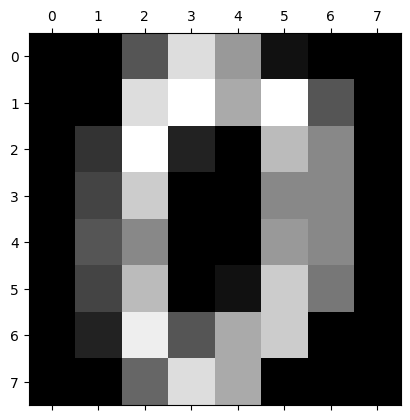

In [6]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(raw_data[0]) 
plt.show()

In [7]:
target[0]

0

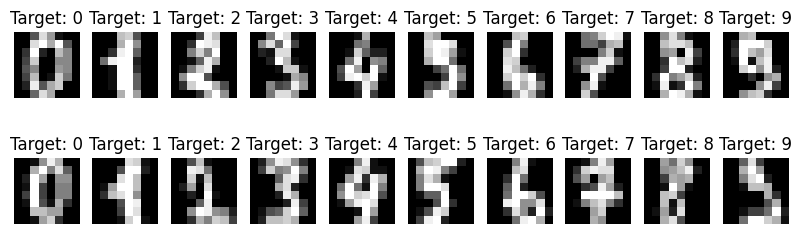

In [8]:
_, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes.reshape(-1), raw_data, target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray)
    ax.set_title('Target: %i' % label)



## Formulate Task
* given an 8x8 image
* task: assign the digit that the image supposedly depicts
* dataset: labelled data -> images + target
* problem type: classification (supervised learning)
* 10 classes: 0,1,...,9 (multi-class classification)

## Setup Experiment

### Preprocessing Data
Adapt the data to be manageable by the algorithms we want to use 

In [9]:
data = raw_data.reshape((len(raw_data), -1))
data.shape # first dimension as before, second and third have been reshaped

(1797, 64)

In [10]:
print("Raw image 0: \n", raw_data[0])
print("Preprocessed image 0: \n", data[0])

Raw image 0: 
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Preprocessed image 0: 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


### Split data 2 ways
Create training and test data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, shuffle=True, random_state=44, stratify=target)

In [12]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1078, 64) (1078,) (719, 64) (719,)


## Training (Machine Learning)

In [13]:
from sklearn import svm
clf = svm.SVC(gamma=0.001)

# Train the classifier
clf.fit(X_train, y_train)

SVC(gamma=0.001)

In [14]:
y_test_pred = clf.predict(X_test)
y_test_pred

array([0, 1, 9, 6, 6, 3, 9, 6, 7, 2, 5, 9, 5, 2, 1, 8, 5, 1, 2, 4, 2, 8,
       6, 6, 4, 9, 1, 1, 8, 0, 2, 2, 3, 6, 8, 8, 8, 3, 4, 7, 7, 3, 4, 8,
       0, 1, 5, 7, 5, 6, 7, 6, 1, 3, 3, 7, 0, 4, 8, 1, 3, 8, 4, 2, 0, 8,
       6, 5, 0, 2, 7, 0, 4, 0, 0, 2, 2, 1, 5, 0, 7, 1, 4, 6, 3, 0, 1, 4,
       3, 4, 7, 9, 2, 3, 1, 2, 2, 9, 6, 5, 2, 4, 1, 5, 5, 0, 1, 0, 9, 7,
       5, 1, 5, 8, 1, 3, 1, 7, 0, 8, 1, 0, 6, 1, 4, 8, 5, 9, 0, 8, 8, 8,
       8, 0, 7, 2, 0, 4, 5, 3, 5, 4, 4, 8, 5, 7, 7, 3, 0, 9, 3, 8, 6, 5,
       4, 6, 6, 2, 2, 5, 7, 3, 1, 8, 4, 1, 7, 6, 7, 9, 6, 4, 8, 1, 9, 4,
       8, 2, 0, 9, 3, 6, 9, 0, 4, 8, 8, 0, 9, 2, 0, 1, 9, 2, 9, 2, 0, 8,
       9, 6, 8, 3, 7, 4, 2, 7, 1, 5, 9, 1, 3, 0, 7, 9, 8, 4, 4, 9, 5, 7,
       5, 1, 6, 2, 8, 7, 0, 3, 9, 5, 5, 6, 6, 9, 2, 1, 1, 4, 5, 1, 6, 3,
       1, 7, 3, 5, 0, 6, 8, 7, 9, 6, 0, 4, 7, 0, 4, 4, 3, 3, 0, 1, 0, 6,
       4, 4, 9, 1, 3, 2, 4, 8, 9, 2, 9, 1, 1, 3, 2, 9, 4, 1, 1, 9, 0, 7,
       9, 5, 9, 0, 4, 6, 3, 9, 6, 0, 7, 8, 2, 3, 6,

<class 'numpy.ndarray'>


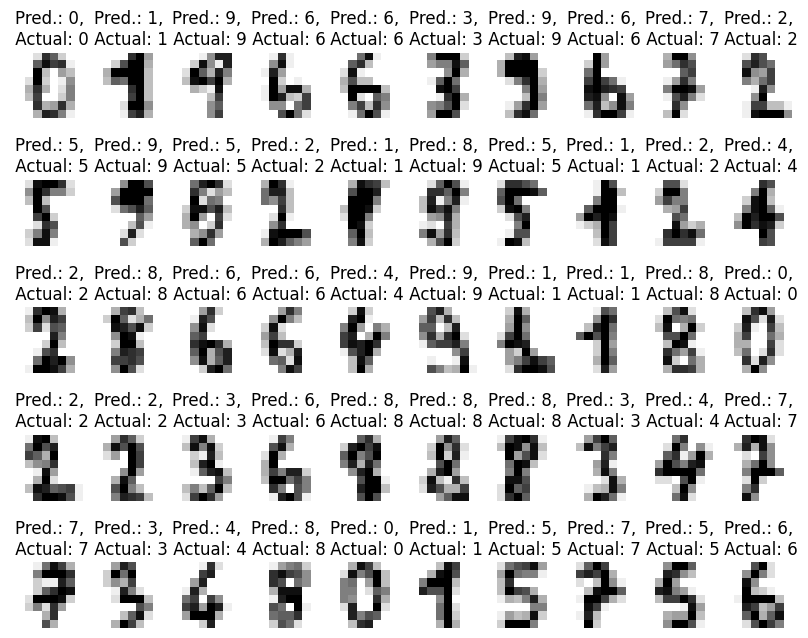

In [15]:
_, axes = plt.subplots(nrows=5, ncols=10, figsize=(10, 8))
print(type(axes))
for ax, image, prediction, actual in zip(axes.reshape(-1), X_test, y_test_pred, y_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred.: {prediction},\n Actual: {actual}')

## Evaluation
* Classify data instances, that the classifier did __not__ see during the training phase
* Check how many are classified correctly

In [16]:
from sklearn import metrics
print("Acc on test data: ", round(metrics.accuracy_score(y_test, y_test_pred),5))

Acc on test data:  0.9847


### Comparison to Random Baseline: 
* 10 classes, random guessing of the correct class
* expected: 1 out of 10 times guessed correctly -> acc=0.1
* our classifier beats the random baseline easily

<div class="alert alert-block alert-info">
<b>Take Aways:</b> 

* Broad overview about the steps neccessary for performing a classification experiment.
* Basics of a rudimentary experimental setup.
* Ideas for improvements of the experimental design. 
* A baseline to compare results to.
</div>

<div class="alert alert-block alert-success">
<b>Play with:</b> 
    
* different random states
* a train test split without the stratify parameter
* train test splits with different sizes for the test set
* an SVM with a different value for C
</div>

## Exercise 1:
For the classification experiment on the digits dataset, compute the largest class baseline.

In [21]:
np.unique(y_train, return_counts= True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([107, 109, 106, 110, 109, 109, 109, 107, 104, 108], dtype=int64))

3 has the most occurences 

In [43]:
baseline = y_test == 3
baseline.sum()

print(f'the baseline has {baseline.sum()} out of {len(y_test)} correct.
      \nthis is equal to an accuracy of {baseline.sum() /len(y_test)}')

SyntaxError: unterminated f-string literal (detected at line 4) (1557192878.py, line 4)

## Exercise 2:
For the classification experiment on the digits dataset, plot the confusion matrix of the resulting
 classifier.

In [28]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Q: What is a confusion matrix?

A: A matrix showing the specifity and sensibility. It shows which labels are correctly and wronlgy classified 

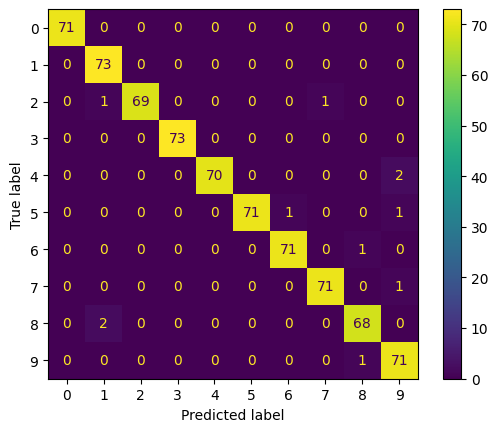

In [29]:
cm = confusion_matrix(y_test, y_test_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

Q: What does an entry aij of the confusion matrix mean?

A: i = actual label, j = predicted label

In [34]:
cm[2,1]

1

Q: Which digits are always predicted correctly in the test data?

A: 0, 1 and 3

If a digit is predicted as 7, how likely is it to be actually a 7?

In [ ]:
71 / 72

0.9861111111111112

 Q: How can we determine the accuracy from the confusion matrix?

 A: Add the values where i == j and devide by the total length

In [50]:
correct = 0

for i in range(len(cm)):
    correct += cm[i,i]

print(f' the accuracy is {correct/len(y_test)}')


 the accuracy is 0.9847009735744089
